
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [29]:
cities

['kargasok',
 'yulara',
 'ellisras',
 'albany',
 'bredasdorp',
 'clyde river',
 'san pedro',
 'tessalit',
 'arraial do cabo',
 'port alfred',
 'mataura',
 'barrow',
 'tongren',
 'sentyabrskiy',
 'busselton',
 'carnarvon',
 'mys shmidta',
 'atuona',
 'rikitea',
 'tuatapere',
 'pangnirtung',
 'bluff',
 'straja',
 'qaanaaq',
 'upernavik',
 'attawapiskat',
 'teya',
 'puerto ayora',
 'japura',
 'katsuura',
 'ushuaia',
 'punta arenas',
 'vaini',
 'hasaki',
 'saskylakh',
 'hilo',
 'pevek',
 'santa isabel do rio negro',
 'southbridge',
 'chuy',
 'bathsheba',
 'sao joao da barra',
 'yellowknife',
 'hermanus',
 'kasongo-lunda',
 'hobart',
 'baruun-urt',
 'pisco',
 'khatanga',
 'butaritari',
 'poum',
 'haines junction',
 'ponta do sol',
 'epernay',
 'flinders',
 'morgan city',
 'ostrovnoy',
 'jamestown',
 'avarua',
 'kitimat',
 'kavieng',
 'rorvik',
 'mount isa',
 'lebu',
 'hithadhoo',
 'cherskiy',
 'sao felix do xingu',
 'itarema',
 'georgetown',
 'prince rupert',
 'mocambique',
 'touros',
 'rib

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?"
empty_city = []
print("Beginning Data Retrieval")     
print("-----------------------------")

record = 1
Set = 1

for i,x in enumerate(cities):
    if (i % 50 == 0 and i>=50):
        Set += 1
        record = 0
    print(f"Processing Record {record} of Set {Set} | {x}")
    record += 1

    endpoint = f"{url}units=Imperial&APPID={g_key}&q={x}"
    response = requests.get(endpoint).json()
    city_dic = {}
    
    try:
        city_dic["City"] = response["name"]
        city_dic["Cloudiness"] = response["clouds"]["all"]
        city_dic["Country"] = response["sys"]["country"]
        city_dic["Date"] = response["dt"]
        city_dic["Humidity"] = response["main"]["humidity"]
        city_dic["Lat"] = response["coord"]["lat"]
        city_dic["Lng"] = response["coord"]["lon"]
        city_dic["Max Temp"] = response["main"]["temp_max"]
        city_dic["Wind Speed"] = response["wind"]["speed"]
        empty_city.append(city_dic)
        #empty_city(response["results"][0]["empty_city"])
        #print(f"character {i} not found")
        
    except:
        print("city not found")
    
    

    
    #try and except (false, print = City not found. Skipping...)
    
    
    
# Build query URL
#endpoint

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kargasok
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | ellisras
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | san pedro
Processing Record 8 of Set 1 | tessalit
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | tongren
Processing Record 14 of Set 1 | sentyabrskiy
city not found
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | mys shmidta
city not found
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | pangnirtung
Processing Record 22 of Set 1 | bluff
Process

Processing Record 40 of Set 4 | tsihombe
city not found
Processing Record 41 of Set 4 | waterloo
Processing Record 42 of Set 4 | riyadh
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | phan rang
city not found
Processing Record 45 of Set 4 | kungurtug
Processing Record 46 of Set 4 | kondagaon
Processing Record 47 of Set 4 | gizo
Processing Record 48 of Set 4 | ballina
Processing Record 49 of Set 4 | puga
Processing Record 0 of Set 5 | san cristobal
Processing Record 1 of Set 5 | varkaus
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | waingapu
Processing Record 4 of Set 5 | ulaangom
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | sabratah
Processing Record 7 of Set 5 | rungata
city not found
Processing Record 8 of Set 5 | porto novo
Processing Record 9 of Set 5 | faya
Processing Record 10 of Set 5 | puerto asis
Processing Record 11 of Set 5 | kerman
Processing Record 12 of Set 5 | mishan
Processing Record 13 of Set 5 | tasii

KeyboardInterrupt: 

In [17]:
endpoint = f"{url}units=Imperial&APPID={g_key}&q={x}"
response = requests.get(endpoint).json()
city_dic = {}
endpoint = f"{url}units=Imperial&APPID={g_key}&q={x}"
response = requests.get(endpoint).json()
city_dic = {}
city_dic["City"] = response

empty_city.append(city_dic)
city_dic

{'City': {'coord': {'lon': -147.8, 'lat': 64.86},
  'weather': [{'id': 600,
    'main': 'Snow',
    'description': 'light snow',
    'icon': '13d'},
   {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}],
  'base': 'stations',
  'main': {'temp': 25.68,
   'feels_like': 17.8,
   'temp_min': 24.01,
   'temp_max': 27,
   'pressure': 1013,
   'humidity': 92},
  'visibility': 3219,
  'wind': {'speed': 5.77, 'deg': 221},
  'clouds': {'all': 90},
  'dt': 1603827265,
  'sys': {'type': 1,
   'id': 7683,
   'country': 'US',
   'sunrise': 1603819462,
   'sunset': 1603849525},
  'timezone': -28800,
  'id': 5859699,
  'name': 'College',
  'cod': 200}}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
df = pd.DataFrame(empty_city)
df.to_csv('list.csv', index=False)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kargasok,100,RU,1603844737,98,59.06,80.86,25.77,13.24
1,Yulara,0,AU,1603844737,13,-25.24,130.99,80.60,3.36
2,Ellisras,0,ZA,1603844737,43,-23.66,27.74,71.78,6.20
3,Albany,100,US,1603844702,76,42.60,-73.97,48.00,5.12
4,Bredasdorp,100,ZA,1603844738,88,-34.53,20.04,62.60,4.70


In [32]:
df.to_excel("cities.xlsx") 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

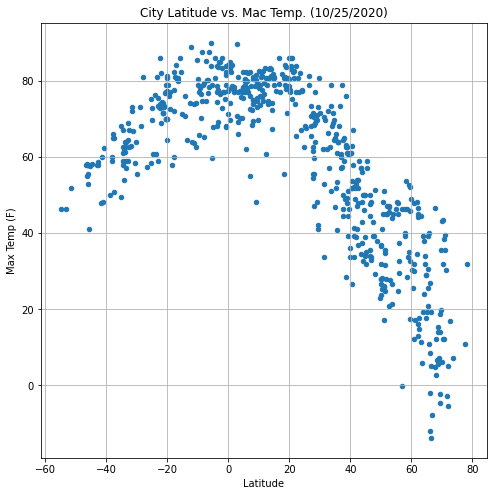

In [11]:
df.plot(kind="scatter", x="Lat", y="Max Temp", figsize=(8,8))
plt.title("City Latitude vs. Mac Temp. (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("Temp.png")
plt.show()

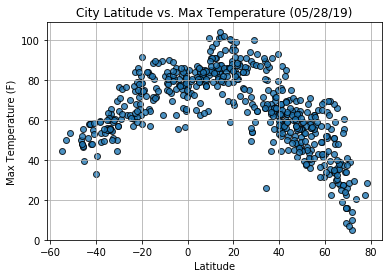

#### Latitude vs. Humidity Plot

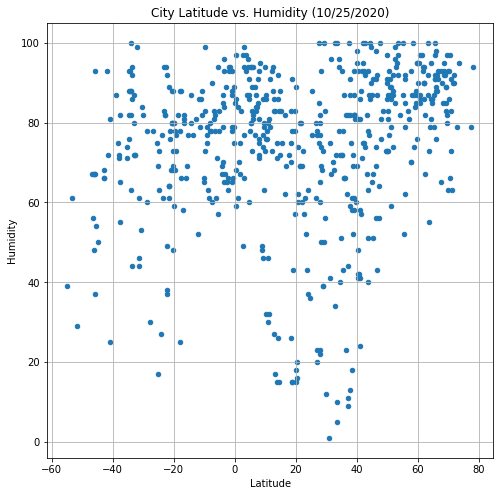

In [12]:
df.plot(kind="scatter", x="Lat", y="Humidity", figsize=(8,8))
plt.title("City Latitude vs. Humidity (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("hum.png")
plt.show()

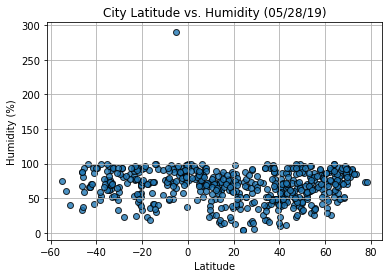

#### Latitude vs. Cloudiness Plot

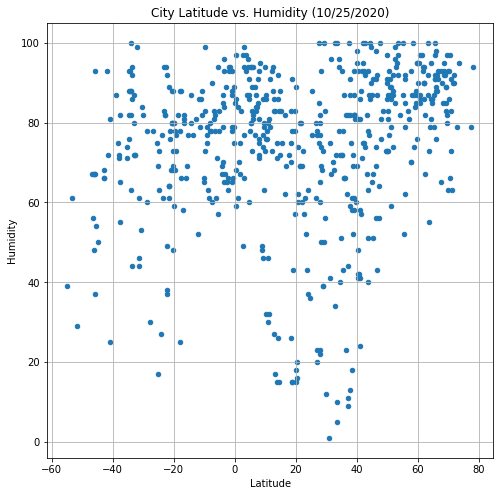

In [13]:
df.plot(kind="scatter", x="Lat", y="Humidity", figsize=(8,8))
plt.title("City Latitude vs. Humidity (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("hum.png")
plt.show()

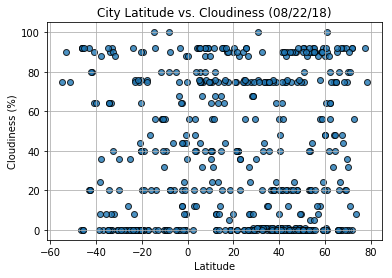

#### Latitude vs. Wind Speed Plot

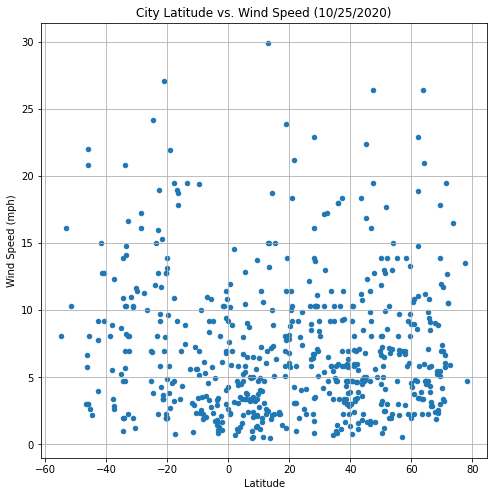

In [14]:
df.plot(kind="scatter", x="Lat", y="Wind Speed", figsize=(8,8))
plt.title("City Latitude vs. Wind Speed (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("wind.png")
plt.show()

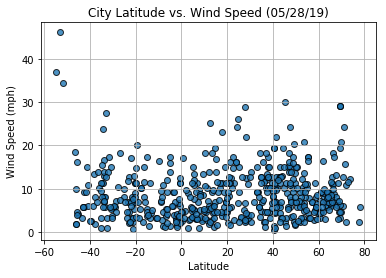

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern Hemisphere DataFrames
N_hem = df.loc[df['Lng'] > 0]

In [16]:
# Southern Hemisphere DataFrames
S_hem = df.loc[df['Lng'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

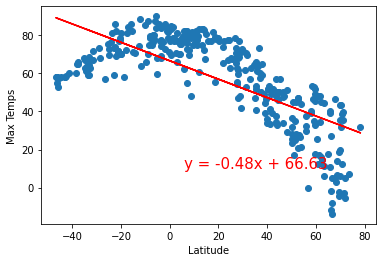

In [17]:
x_values = N_hem['Lat']
y_values = N_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temps')
plt.show()

The r-squared is: -0.8151657406810827


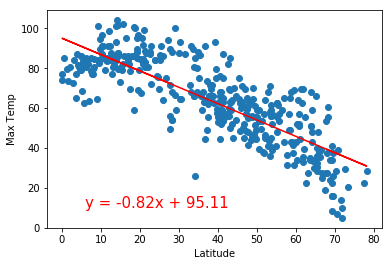

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

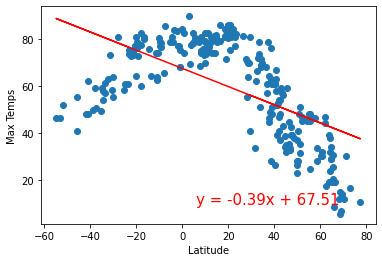

In [18]:
x_values = S_hem['Lat']
y_values = S_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temps')
plt.show()

The r-squared is: 0.760263355051646


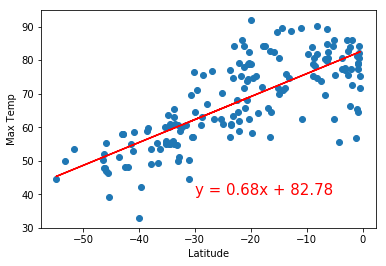

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

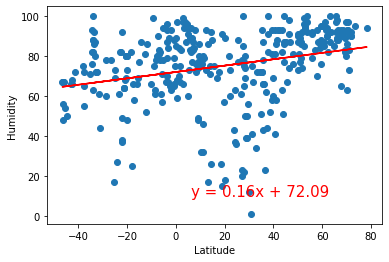

In [19]:
x_values = N_hem['Lat']
y_values = N_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: 0.10358336015746494


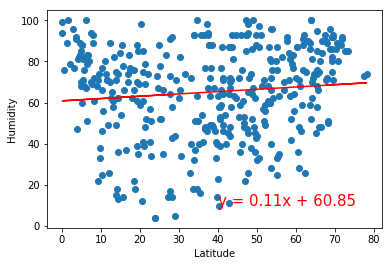

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

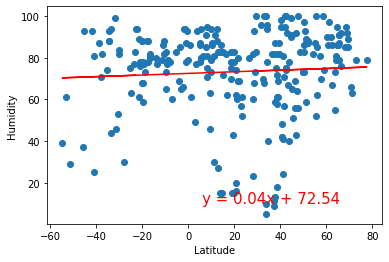

In [20]:
x_values = S_hem['Lat']
y_values = S_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

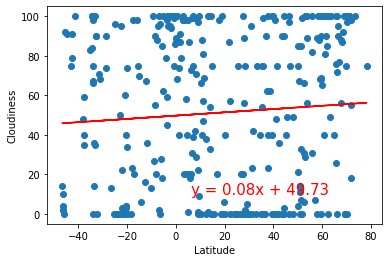

In [21]:
x_values = N_hem['Lat']
y_values = N_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

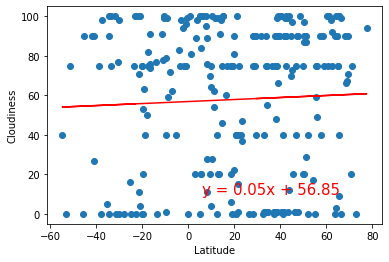

In [22]:
x_values = S_hem['Lat']
y_values = S_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

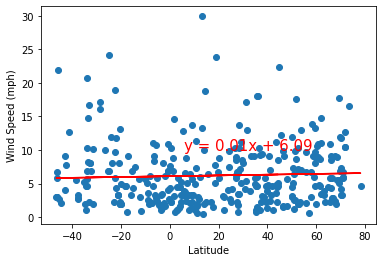

In [23]:
x_values = N_hem['Lat']
y_values = N_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

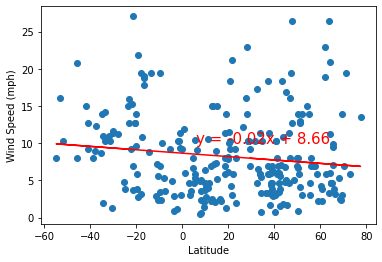

In [24]:
x_values = S_hem['Lat']
y_values = S_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()